# Multiple Machine Learning Algorithms for Spam Mail Detection
**by David Deu**

Credits to Simou Chen

## Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding= 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

df = df.rename(columns={'v1': 'label', 'v2': 'text'})
print(df.columns)

Index(['label', 'text'], dtype='object')


In [3]:
df['label_tag'] = df['label'].map({'ham': 0, 'spam': 1})

In [4]:
X = df['text']
y = df['label_tag']

In [5]:
# Tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')  
X_tfidf = tfidf_vectorizer.fit_transform(X) 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, shuffle=True, random_state=0)

## Support Vector Machine

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Apply Support Vector Machine with Radial Basis Function (RBF)
svm_model = SVC(kernel='rbf', gamma='scale')  

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with RBF kernel on SMS Spam dataset: {accuracy:.4f}')


Accuracy of SVM with RBF kernel on SMS Spam dataset: 0.9684


In [9]:
from sklearn.model_selection import cross_val_score
 

svm_model = SVC(kernel='rbf', gamma='scale')

cv_scores = cross_val_score(svm_model, X_tfidf, y, cv=5)  # 5 folds

# 8. Imprimir los resultados de Cross-Validation
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation scores for each fold: [0.97399103 0.97040359 0.96768402 0.96858169 0.97217235]
Mean cross-validation accuracy: 0.9706


# Decision Tree

Accuracy of Decision Tree Classifier: 0.9677


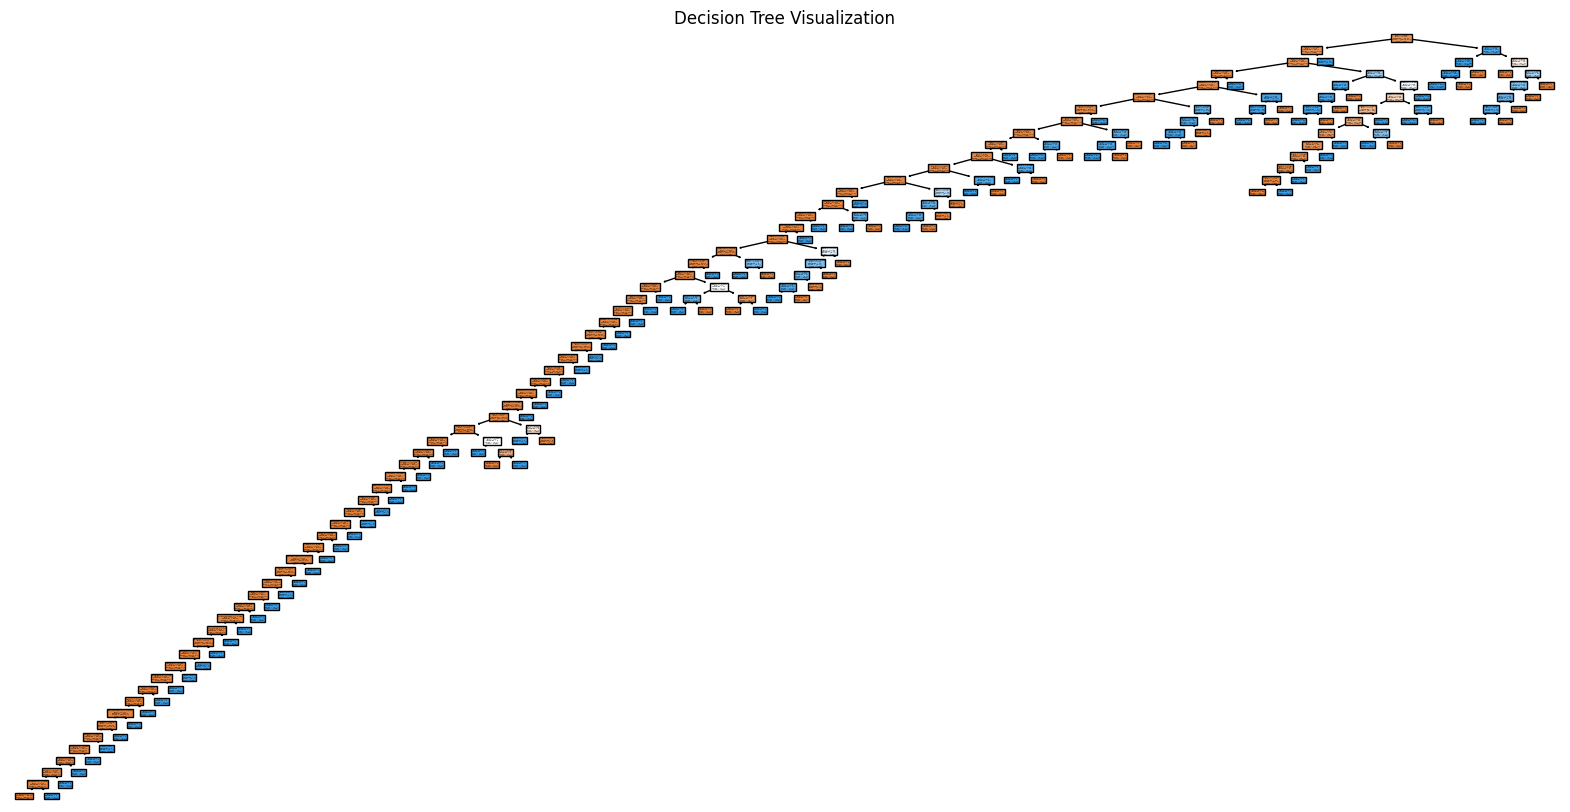

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)
# max_depth, min_samples_split and min_samples_leaf 
# configuration don't improve the accuracy
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier: {accuracy:.4f}')

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=['ham', 'spam'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [11]:
cv_scores = cross_val_score(dt_model, X_tfidf, y, cv=5)  

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation scores for each fold: [0.97668161 0.97309417 0.96678636 0.96678636 0.96947935]
Mean cross-validation accuracy: 0.9706


## Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naïve Bayes Classifier: {accuracy:.4f}')

Accuracy of Naïve Bayes Classifier: 0.9641


In [23]:
cv_scores = cross_val_score(nb_model, X_tfidf, y, cv=5) 

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation scores for each fold: [0.97668161 0.967713   0.96319569 0.97127469 0.97217235]
Mean cross-validation accuracy: 0.9702


## Neural Network

In [24]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense

def build_model(input_dim, epochs=5):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

epochs = 10
print(f'\nTraining with {epochs} epochs...')

model = build_model(X_train.shape[1], epochs=epochs)
model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

# Evaluar el modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with {epochs} epochs: {accuracy:.4f}')


Training with 10 epochs...


c:\Users\david\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8552 - loss: 0.5018
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9814 - loss: 0.0781
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9969 - loss: 0.0143
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0041
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9991 - loss: 0.0051
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9998 - loss: 0.0016
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9995 - loss: 0.0017
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 8.8178e-04
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.4394e-04
Epoch 10/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.8500e-04
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy with 10 epochs: 0.9835
